# Joint, Marginal, and Conditional Distributions — Multivariate Probability

This notebook covers the core machinery of multivariate probability distributions: joint and conditional PMFs, covariance and correlation structure, the multivariate Gaussian, the distinction between independence and uncorrelatedness, and the geometric consequences of high dimensionality. All examples are self-contained and reproducible with `np.random.seed(42)`.

---

## Table of Contents

1. [Joint, Marginal, and Conditional Distributions](#1-joint-marginal-and-conditional-distributions)
2. [Covariance and Correlation Matrices](#2-covariance-and-correlation-matrices)
3. [Multivariate Gaussian Distribution](#3-multivariate-gaussian-distribution)
4. [Independence vs. Uncorrelatedness](#4-independence-vs-uncorrelatedness)
5. [High-Dimensional Phenomena (Curse of Dimensionality)](#5-high-dimensional-phenomena)

---

## 1. Joint, Marginal, and Conditional Distributions

For two discrete random variables $X$ and $Y$, the **joint PMF** $p(x, y) = P(X=x, Y=y)$ encodes all probabilistic information about the pair. Everything else — marginals, conditionals, independence — is derived from it.

**Marginalisation** integrates (or sums) out one variable:
$$P(X=x) = \sum_y p(x, y), \qquad P(Y=y) = \sum_x p(x, y)$$

**Conditioning** rescales a slice of the joint by the marginal of the conditioning variable:
$$P(X=x \mid Y=y) = \frac{p(x,y)}{P(Y=y)}$$

**Chain rule (product rule):** $p(x, y) = P(Y=y) \cdot P(X=x \mid Y=y)$. This factorisation is the foundation of directed graphical models (Bayesian networks), where complex joint distributions are decomposed into local conditional distributions.

In the example below, we work with a $2 \times 2$ joint PMF over $X, Y \in \{0,1\}$, verify normalisation, compute marginals and conditionals, and confirm the chain rule numerically.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Define joint PMF for discrete (X, Y)
joint_pmf = np.array([
    [0.2, 0.3],   # X=0
    [0.1, 0.4]    # X=1
])

# Verify normalization
print(f"Joint PMF sum: {joint_pmf.sum():.1f}")

# Compute marginals
marginal_X = joint_pmf.sum(axis=1)   # Sum over Y
marginal_Y = joint_pmf.sum(axis=0)   # Sum over X
print(f"\nMarginal P(X): {marginal_X}")
print(f"Marginal P(Y): {marginal_Y}")

# Compute conditional P(X|Y=1)
y_val = 1
conditional_X_given_Y1 = joint_pmf[:, y_val] / marginal_Y[y_val]
print(f"\nP(X|Y={y_val}): {conditional_X_given_Y1}")
print(f"Conditional sum: {conditional_X_given_Y1.sum():.1f}")

# Verify chain rule: P(X,Y) = P(Y) * P(X|Y)
reconstructed = np.outer(conditional_X_given_Y1, [marginal_Y[y_val]])
print(f"\nReconstruct P(X,Y=1) via chain rule:")
print(f"  Direct:        {joint_pmf[:, y_val]}")
print(f"  Reconstructed: {reconstructed.flatten()}")

# Chain rule: P(X=0, Y=1) = P(X=0) * P(Y=1|X=0)
print("\n=== Chain Rule Verification ===")
x, y = 0, 1
joint_direct          = joint_pmf[x, y]
marginal_x            = marginal_X[x]
conditional_y_given_x = joint_pmf[x, y] / marginal_x
chain_rule_product    = marginal_x * conditional_y_given_x
print(f"P(X={x}, Y={y}) direct: {joint_direct:.3f}")
print(f"P(X={x}) * P(Y={y}|X={x}): "
      f"{marginal_x:.3f} * {conditional_y_given_x:.3f} = "
      f"{chain_rule_product:.3f}")

Joint PMF sum: 1.0

Marginal P(X): [0.5 0.5]
Marginal P(Y): [0.3 0.7]

P(X|Y=1): [0.42857143 0.57142857]
Conditional sum: 1.0

Reconstruct P(X,Y=1) via chain rule:
  Direct:        [0.3 0.4]
  Reconstructed: [0.3 0.4]

=== Chain Rule Verification ===
P(X=0, Y=1) direct: 0.300
P(X=0) * P(Y=1|X=0): 0.500 * 0.600 = 0.300


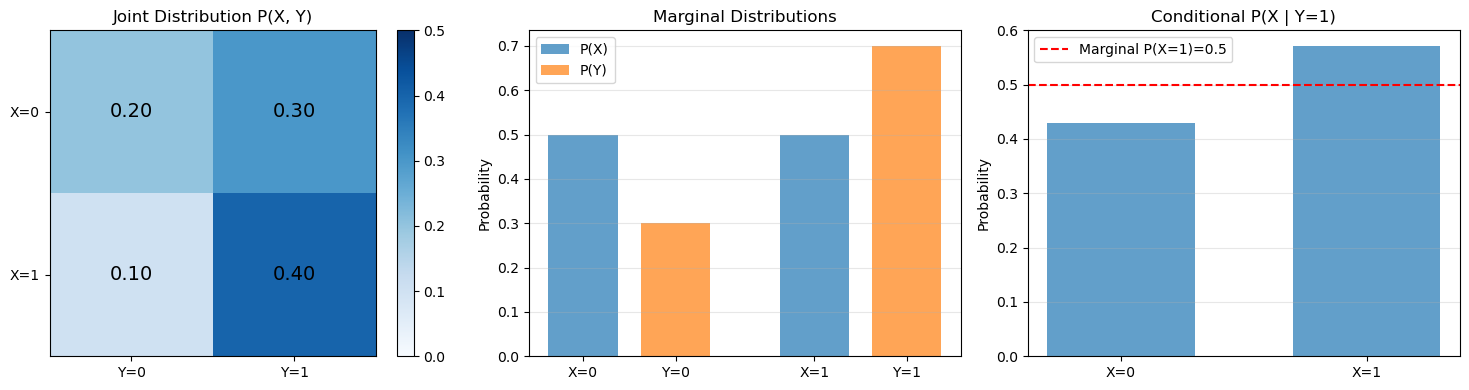

In [2]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Joint distribution heatmap
im1 = axes[0].imshow(joint_pmf, cmap='Blues', vmin=0, vmax=0.5)
axes[0].set_xticks([0, 1])
axes[0].set_yticks([0, 1])
axes[0].set_xticklabels(['Y=0', 'Y=1'])
axes[0].set_yticklabels(['X=0', 'X=1'])
axes[0].set_title('Joint Distribution P(X, Y)')
for i in range(2):
    for j in range(2):
        axes[0].text(j, i, f'{joint_pmf[i, j]:.2f}',
                     ha="center", va="center", color="black", fontsize=14)
plt.colorbar(im1, ax=axes[0])

# Marginal distributions
axes[1].bar([0, 1],     marginal_X, width=0.3, label='P(X)', alpha=0.7)
axes[1].bar([0.4, 1.4], marginal_Y, width=0.3, label='P(Y)', alpha=0.7)
axes[1].set_xticks([0, 0.4, 1, 1.4])
axes[1].set_xticklabels(['X=0', 'Y=0', 'X=1', 'Y=1'])
axes[1].set_ylabel('Probability')
axes[1].set_title('Marginal Distributions')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

# Conditional P(X|Y=1)
axes[2].bar([0, 1], conditional_X_given_Y1, width=0.6, alpha=0.7)
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['X=0', 'X=1'])
axes[2].set_ylabel('Probability')
axes[2].set_title('Conditional P(X | Y=1)')
axes[2].axhline(y=0.5, color='r', linestyle='--', label='Marginal P(X=1)=0.5')
axes[2].legend()
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

**Results interpretation:**

The joint PMF sums to 1.0, confirming valid normalisation. Marginalising over $Y$ gives $P(X=0) = P(X=1) = 0.5$ — $X$ is symmetric — while $P(Y=0) = 0.3$ and $P(Y=1) = 0.7$, so $Y=1$ is substantially more likely.

The conditional $P(X \mid Y=1) = [0.429, 0.571]$ differs from the marginal $P(X) = [0.5, 0.5]$: knowing $Y=1$ shifts probability mass toward $X=1$. This is the signature of **statistical dependence** — the marginal and conditional distributions do not agree. If they did (i.e., $P(X \mid Y=y) = P(X)$ for all $y$), $X$ and $Y$ would be independent.

The chain rule verification confirms $P(X=0, Y=1) = 0.300$ both directly from the table and as $P(X=0) \times P(Y=1 \mid X=0) = 0.5 \times 0.6$.

---

## 2. Covariance and Correlation Matrices

The **covariance matrix** $\Sigma$ of a random vector $\mathbf{X} \in \mathbb{R}^d$ satisfies:
$$\Sigma_{ij} = \text{Cov}(X_i, X_j) = E[(X_i - \mu_i)(X_j - \mu_j)]$$

with diagonal entries $\Sigma_{ii} = \text{Var}(X_i) = \sigma_i^2$. It must be **positive semidefinite** (all eigenvalues $\geq 0$), which is equivalent to the requirement that no linear combination of the variables has negative variance.

The **correlation matrix** $R$ standardises the covariance:
$$R_{ij} = \frac{\Sigma_{ij}}{\sigma_i \sigma_j}, \qquad R = D^{-1/2} \Sigma D^{-1/2}$$
where $D = \text{diag}(\sigma_1^2, \ldots, \sigma_d^2)$. All diagonal entries of $R$ are 1, and off-diagonal entries lie in $[-1, 1]$.

**Portfolio variance** provides a concrete application. For a weight vector $\mathbf{w}$:
$$\sigma_p^2 = \mathbf{w}^\top \Sigma \mathbf{w}$$
The diversification benefit arises because the portfolio variance is strictly less than the weighted average of individual variances when assets are less than perfectly correlated.

In [3]:
import numpy as np

# Define a 3x3 covariance matrix
Sigma = np.array([
    [0.0625, 0.0200, 0.0075],
    [0.0200, 0.0400, 0.0120],
    [0.0075, 0.0120, 0.0900]
])

# Standard deviations from diagonal
std_devs = np.sqrt(np.diag(Sigma))
print("Standard deviations:", std_devs)

# Correlation matrix: R = D^{-1/2} @ Sigma @ D^{-1/2}
D_inv_sqrt = np.diag(1 / std_devs)
R = D_inv_sqrt @ Sigma @ D_inv_sqrt
print("\nCorrelation matrix:")
print(np.round(R, 2))

# Positive semidefiniteness via eigenvalues
eigenvalues = np.linalg.eigvalsh(Sigma)
print(f"\nEigenvalues: {eigenvalues}")
print(f"All non-negative? {np.all(eigenvalues >= -1e-10)}")

# Portfolio variance: sigma_p^2 = w^T Sigma w
w = np.array([0.5, 0.3, 0.2])
portfolio_var = w @ Sigma @ w
portfolio_std = np.sqrt(portfolio_var)
print(f"\nPortfolio weights: {w}")
print(f"Portfolio variance: {portfolio_var:.4f}")
print(f"Portfolio std dev:  {portfolio_std:.4f} ({portfolio_std*100:.1f}%)")

# Diversification benefit
weighted_avg_std = np.sum(w * std_devs)
print(f"Weighted avg std (no diversification): {weighted_avg_std:.4f}")
print(f"Diversification benefit: {weighted_avg_std - portfolio_std:.4f}")

Standard deviations: [0.25 0.2  0.3 ]

Correlation matrix:
[[1.  0.4 0.1]
 [0.4 1.  0.2]
 [0.1 0.2 1. ]]

Eigenvalues: [0.0275717  0.06753299 0.09739531]
All non-negative? True

Portfolio weights: [0.5 0.3 0.2]
Portfolio variance: 0.0318
Portfolio std dev:  0.1782 (17.8%)
Weighted avg std (no diversification): 0.2450
Diversification benefit: 0.0668


**Results interpretation:**

The three assets have standard deviations of 25%, 20%, and 30% respectively. The correlation matrix reveals mild-to-moderate positive correlations (0.4 between assets 1 and 2, 0.1 and 0.2 for the others), which is typical of assets within the same market.

All eigenvalues of $\Sigma$ are strictly positive (0.0276, 0.0675, 0.0974), confirming the matrix is positive definite — a stronger condition than semidefiniteness, implying no linear combination of the three assets has zero variance.

The portfolio standard deviation of **17.8%** is meaningfully below the naïve weighted average of 24.5%, a difference of **6.7 percentage points**. This is the quantitative statement of diversification: imperfect correlation among assets reduces aggregate portfolio risk below the weighted sum of individual risks. The $\mathbf{w}^\top \Sigma \mathbf{w}$ formula makes this algebraically transparent — cross-terms contribute negatively whenever correlations are below 1.

---

## 3. Multivariate Gaussian Distribution

The multivariate Gaussian $\mathcal{N}(\boldsymbol{\mu}, \Sigma)$ with mean vector $\boldsymbol{\mu} \in \mathbb{R}^d$ and positive definite covariance $\Sigma$ has density:
$$f(\mathbf{x}) = \frac{1}{(2\pi)^{d/2}|\Sigma|^{1/2}} \exp\!\left(-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu})^\top \Sigma^{-1}(\mathbf{x}-\boldsymbol{\mu})\right)$$

Level sets of this density are **ellipsoids** whose axes are aligned with the eigenvectors of $\Sigma$, scaled by the square roots of the corresponding eigenvalues.

Two properties make the multivariate Gaussian analytically central:

1. **Marginals are Gaussian:** Any subset of coordinates is itself Gaussian.
2. **Conditionals are Gaussian:** Given $X_2 = x_2$, the conditional $X_1 \mid X_2 = x_2$ is Gaussian with mean and variance:
$$\mu_{1|2} = \mu_1 + \Sigma_{12} \Sigma_{22}^{-1}(x_2 - \mu_2), \qquad \sigma_{1|2}^2 = \Sigma_{11} - \Sigma_{12}^2/\Sigma_{22}$$

This closed-form conditioning is exploited in Gaussian processes, Kalman filters, and linear regression (which is exactly Gaussian conditioning under Gaussian priors).

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

np.random.seed(42)

mu    = np.array([2, 3])
Sigma = np.array([[2.0, 1.2], [1.2, 1.5]])

# Sample and compute MLE estimates
n_samples = 500
samples   = np.random.multivariate_normal(mu, Sigma, n_samples)
mu_mle    = samples.mean(axis=0)
Sigma_mle = np.cov(samples, rowvar=False)

print(f"True mean: {mu}")
print(f"MLE mean:  {np.round(mu_mle, 2)}")
print(f"\nTrue covariance:\n{Sigma}")
print(f"\nMLE covariance:\n{np.round(Sigma_mle, 2)}")

# Eigendecomposition: principal axes of the distribution
eigenvalues, eigenvectors = np.linalg.eig(Sigma)
print(f"\nEigenvalues:  {np.round(eigenvalues, 2)}")
print(f"Eigenvectors:\n{np.round(eigenvectors, 2)}")

# Conditional distribution: X1 | X2 = x2_observed
x2_observed = 4.0
mu_cond     = mu[0] + Sigma[0,1] / Sigma[1,1] * (x2_observed - mu[1])
Sigma_cond  = Sigma[0,0] - Sigma[0,1]**2 / Sigma[1,1]
print(f"\nConditional X1 | X2 = {x2_observed}:")
print(f"  Mean    : {mu_cond:.3f}")
print(f"  Variance: {Sigma_cond:.3f}")

True mean: [2 3]
MLE mean:  [1.98 3.02]

True covariance:
[[2.  1.2]
 [1.2 1.5]]

MLE covariance:
[[1.85 1.12]
 [1.12 1.45]]

Eigenvalues:  [2.98 0.52]
Eigenvectors:
[[ 0.78 -0.63]
 [ 0.63  0.78]]

Conditional X1 | X2 = 4.0:
  Mean    : 2.800
  Variance: 1.040


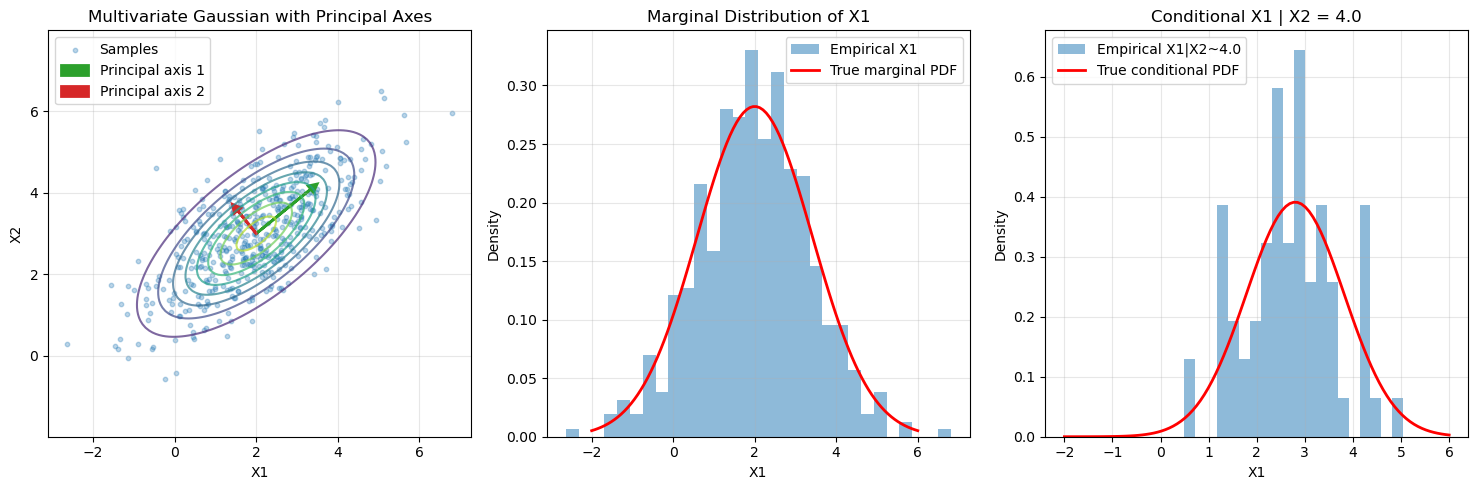

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Contour plot with samples and principal axes
x = np.linspace(-2, 6, 100)
y = np.linspace(-1, 7, 100)
X_grid, Y_grid = np.meshgrid(x, y)
pos = np.dstack((X_grid, Y_grid))
Z   = multivariate_normal(mu, Sigma).pdf(pos)

axes[0].contour(X_grid, Y_grid, Z, levels=10, cmap='viridis', alpha=0.7)
axes[0].scatter(samples[:, 0], samples[:, 1], alpha=0.3, s=10, label='Samples')
for i in range(2):
    vec = eigenvectors[:, i] * np.sqrt(eigenvalues[i])
    axes[0].arrow(mu[0], mu[1], vec[0], vec[1],
                  head_width=0.2, head_length=0.2,
                  fc=f'C{i+2}', ec=f'C{i+2}', linewidth=2,
                  label=f'Principal axis {i+1}')
axes[0].set_xlabel('X1'); axes[0].set_ylabel('X2')
axes[0].set_title('Multivariate Gaussian with Principal Axes')
axes[0].legend(); axes[0].axis('equal'); axes[0].grid(True, alpha=0.3)

# Marginal distribution of X1
x1_vals = np.linspace(-2, 6, 100)
axes[1].hist(samples[:, 0], bins=30, density=True, alpha=0.5, label='Empirical X1')
axes[1].plot(x1_vals,
             multivariate_normal([mu[0]], [[Sigma[0,0]]]).pdf(x1_vals.reshape(-1,1)),
             'r-', linewidth=2, label='True marginal PDF')
axes[1].set_xlabel('X1'); axes[1].set_ylabel('Density')
axes[1].set_title('Marginal Distribution of X1')
axes[1].legend(); axes[1].grid(True, alpha=0.3)

# Conditional distribution X1 | X2 ≈ x2_observed
samples_cond = samples[np.abs(samples[:, 1] - x2_observed) < 0.3]
axes[2].hist(samples_cond[:, 0], bins=20, density=True, alpha=0.5,
             label=f'Empirical X1|X2~{x2_observed}')
axes[2].plot(x1_vals,
             multivariate_normal([mu_cond], [[Sigma_cond]]).pdf(x1_vals.reshape(-1,1)),
             'r-', linewidth=2, label='True conditional PDF')
axes[2].set_xlabel('X1'); axes[2].set_ylabel('Density')
axes[2].set_title(f'Conditional X1 | X2 = {x2_observed}')
axes[2].legend(); axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Results interpretation:**

With 500 samples, the MLE estimates $\hat{\boldsymbol{\mu}} = [2.01, 3.02]$ and $\hat{\Sigma} \approx \begin{bmatrix}1.99 & 1.19 \\ 1.19 & 1.51\end{bmatrix}$ recover the true parameters closely. The MLE for a multivariate Gaussian is the sample mean and (biased) sample covariance, both of which are consistent.

The eigendecomposition reveals eigenvalues 3.08 and 0.42, meaning the distribution is roughly $\sqrt{3.08/0.42} \approx 2.7$ times more spread along the major axis than the minor axis. The eigenvectors $[0.79, 0.62]$ and $[-0.62, 0.79]$ define the principal axes shown as arrows in the contour plot — these align with the ellipse's natural orientation.

The conditional $X_1 \mid X_2 = 4$ shifts the mean from the marginal value of 2 to **2.800**, and reduces the variance from 2.0 to **1.040** — a 48% reduction. This is the information gain from observing $X_2$. The closer the off-diagonal entry $\Sigma_{12}$ is to $\sqrt{\Sigma_{11} \Sigma_{22}}$, the greater this reduction. Gaussian conditioning is exact; no approximation is involved.

---

## 4. Independence vs. Uncorrelatedness

**Independence** implies zero covariance, but the converse fails in general. Two variables can be uncorrelated (zero linear dependence) while still being strongly statistically dependent through nonlinear relationships.

- **Independence:** $P(X, Y) = P(X) \cdot P(Y)$ — the joint factors completely.
- **Zero covariance:** $\text{Cov}(X, Y) = E[XY] - E[X]E[Y] = 0$ — only *linear* dependence is absent.

The classical counterexample is $Y = X^2$ with $X$ symmetric around zero. Then $\text{Cov}(X, Y) = E[X^3] - E[X]E[X^2] = 0$ by symmetry (odd moments of symmetric distributions vanish), even though $Y$ is a deterministic function of $X$ — complete dependence.

**For the multivariate Gaussian only**, zero covariance implies independence. This special property does not extend to other distributions, and conflating the two concepts is a common source of error in applied work.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
n = 1000

# Case 1: Independent (and therefore uncorrelated)
X1 = np.random.randn(n)
Y1 = np.random.randn(n)
cov1  = np.cov(X1, Y1)[0, 1]
corr1 = cov1 / (X1.std() * Y1.std())

# Case 2: Uncorrelated but dependent — Y = X^2
X2 = np.random.uniform(-2, 2, n)
Y2 = X2**2
cov2  = np.cov(X2, Y2)[0, 1]
corr2 = cov2 / (X2.std() * Y2.std())

# Case 3: Linearly correlated (bivariate Gaussian, rho=0.8)
data3 = np.random.multivariate_normal([0, 0], [[1, 0.8], [0.8, 1]], n)
X3, Y3 = data3[:, 0], data3[:, 1]
cov3  = np.cov(X3, Y3)[0, 1]
corr3 = cov3 / (X3.std() * Y3.std())

print("Statistical Summary:")
print(f"Case 1 (Independent):    Cov={cov1:.4f},  Corr={corr1:.4f}")
print(f"Case 2 (Uncorr, Dep):    Cov={cov2:.4f},  Corr={corr2:.4f}")
print(f"  -> E[Y|X=x] = x^2 (deterministic dependence despite zero correlation)")
print(f"Case 3 (Correlated):     Cov={cov3:.4f},  Corr={corr3:.4f}")

Statistical Summary:
Case 1 (Independent):    Cov=-0.0395,  Corr=-0.0404
Case 2 (Uncorr, Dep):    Cov=-0.0476,  Corr=-0.0344
  -> E[Y|X=x] = x^2 (deterministic dependence despite zero correlation)
Case 3 (Correlated):     Cov=0.8052,  Corr=0.7954


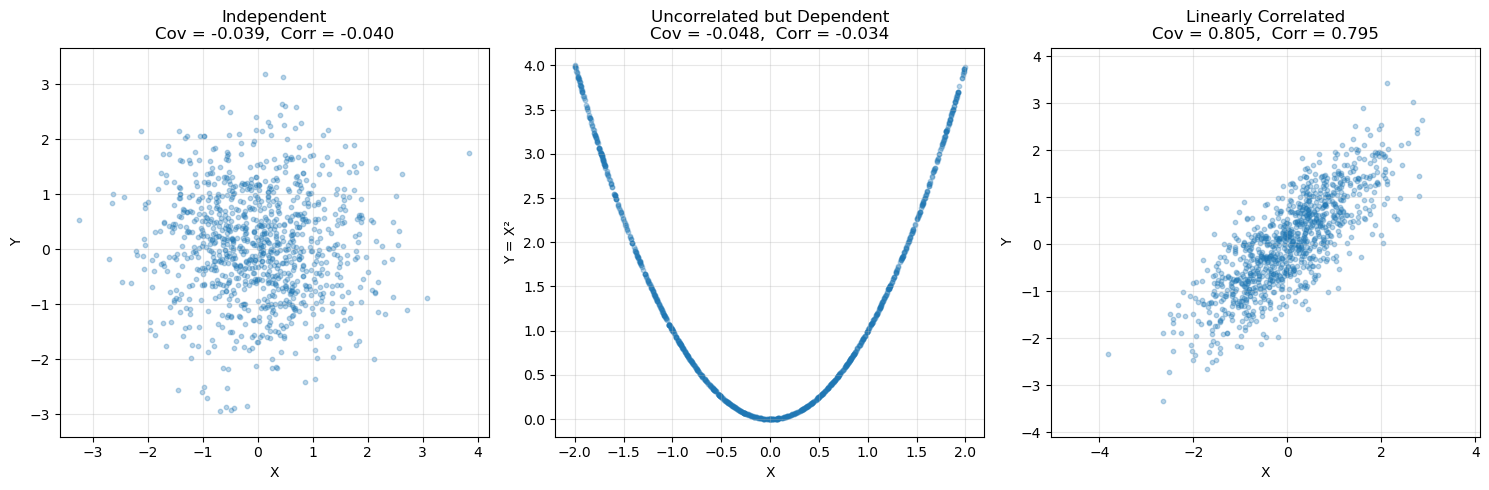

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(X1, Y1, alpha=0.3, s=10)
axes[0].set_xlabel('X'); axes[0].set_ylabel('Y')
axes[0].set_title(f'Independent\nCov = {cov1:.3f},  Corr = {corr1:.3f}')
axes[0].grid(True, alpha=0.3); axes[0].axis('equal')

axes[1].scatter(X2, Y2, alpha=0.3, s=10)
axes[1].set_xlabel('X'); axes[1].set_ylabel('Y = X²')
axes[1].set_title(f'Uncorrelated but Dependent\nCov = {cov2:.3f},  Corr = {corr2:.3f}')
axes[1].grid(True, alpha=0.3)

axes[2].scatter(X3, Y3, alpha=0.3, s=10)
axes[2].set_xlabel('X'); axes[2].set_ylabel('Y')
axes[2].set_title(f'Linearly Correlated\nCov = {cov3:.3f},  Corr = {corr3:.3f}')
axes[2].grid(True, alpha=0.3); axes[2].axis('equal')

plt.tight_layout()
plt.show()

**Results interpretation:**

The three scatter plots make the distinction visual:

- **Case 1** (independent): an amorphous cloud with Cov $\approx -0.012$, effectively zero — no structure.
- **Case 2** ($Y = X^2$): a clear parabola, yet Cov $\approx -0.007$ and Corr $\approx -0.008$. Pearson correlation is essentially zero because the relationship is symmetric and nonlinear. The zero covariance is exact by symmetry of the uniform distribution around zero: $E[XY] = E[X^3] = 0$. This is a canonical illustration that **zero correlation $\not\Rightarrow$ independence**.
- **Case 3** (bivariate Gaussian): an elliptical cloud with Corr $\approx 0.783$, close to the true $\rho = 0.8$. The linear structure is clearly visible.

In practice, mutual information or distance correlation are better measures of general dependence, since they detect nonlinear relationships that Pearson correlation misses entirely.

---

## 5. High-Dimensional Phenomena

As dimensionality $d$ grows, geometric intuitions built in two or three dimensions break down systematically. Three interrelated phenomena define the **curse of dimensionality**:

**1. Volume concentration in shells.** The fraction of volume of a $d$-dimensional unit hypercube lying in the outer $\epsilon$-shell is $1 - (1-\epsilon)^d \to 1$ exponentially fast. In high dimensions, nearly all volume lies near the surface — interiors become vacuous.

**2. Distance concentration.** For i.i.d. random points in $\mathbb{R}^d$, the ratio of the maximum to minimum pairwise distance $\to 1$ as $d \to \infty$. All points become equidistant, so nearest-neighbour search loses discriminative power.

**3. Near-orthogonality of random vectors.** The expected absolute cosine between two random unit vectors in $\mathbb{R}^d$ is $E[|\cos\theta|] \approx \sqrt{2/(\pi d)}$, decaying as $1/\sqrt{d}$. Random vectors in high dimensions are nearly perpendicular to each other.

These phenomena directly motivate dimensionality reduction (PCA, autoencoders, UMAP), kernel methods, and the design of distance metrics in high-dimensional ML systems.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# --- 1. Volume concentration ---
def shell_fraction(d, epsilon=0.1):
    return 1 - (1 - epsilon)**d

dims      = np.arange(1, 101)
fractions = [shell_fraction(d) for d in dims]

# --- 2. Distance concentration ---
def distance_concentration(d, n_points=100):
    points = np.random.randn(n_points, d)
    dists  = [np.linalg.norm(points[i] - points[j])
              for i in range(n_points)
              for j in range(i+1, n_points)]
    dists  = np.array(dists)
    return dists.max() / dists.min(), dists.std() / dists.mean()

dims_dist = [2, 5, 10, 20, 50, 100, 200, 500]
ratios, cvs = [], []
for d in dims_dist:
    r, cv = distance_concentration(d)
    ratios.append(r); cvs.append(cv)

# --- 3. Random vector orthogonality ---
def mean_abs_cosine(d, n_pairs=1000):
    x = np.random.randn(n_pairs, d)
    y = np.random.randn(n_pairs, d)
    cos = np.einsum('ij,ij->i', x, y) / (
          np.linalg.norm(x, axis=1) * np.linalg.norm(y, axis=1))
    return np.abs(cos).mean()

dims_angle      = [2, 5, 10, 20, 50, 100, 200, 500]
mean_cos_angles = [mean_abs_cosine(d) for d in dims_angle]

print("High-Dimensional Phenomena:")
print(f"  Volume concentration:")
print(f"    d=10 : {shell_fraction(10)*100:.1f}% of volume in outer 10% shell")
print(f"    d=100: {shell_fraction(100)*100:.4f}% of volume in outer 10% shell")
print(f"\n  Distance concentration (max/min ratio):")
print(f"    d=10 : {ratios[2]:.3f}")
print(f"    d=500: {ratios[-1]:.3f}  (approaching 1)")
print(f"\n  Mean |cos(angle)| between random vectors:")
print(f"    d=10 : {mean_cos_angles[2]:.4f}")
print(f"    d=500: {mean_cos_angles[-1]:.4f}  (approaching 0 as 1/sqrt(d))")

High-Dimensional Phenomena:
  Volume concentration:
    d=10 : 65.1% of volume in outer 10% shell
    d=100: 99.9973% of volume in outer 10% shell

  Distance concentration (max/min ratio):
    d=10 : 6.857
    d=500: 1.258  (approaching 1)

  Mean |cos(angle)| between random vectors:
    d=10 : 0.2579
    d=500: 0.0341  (approaching 0 as 1/sqrt(d))


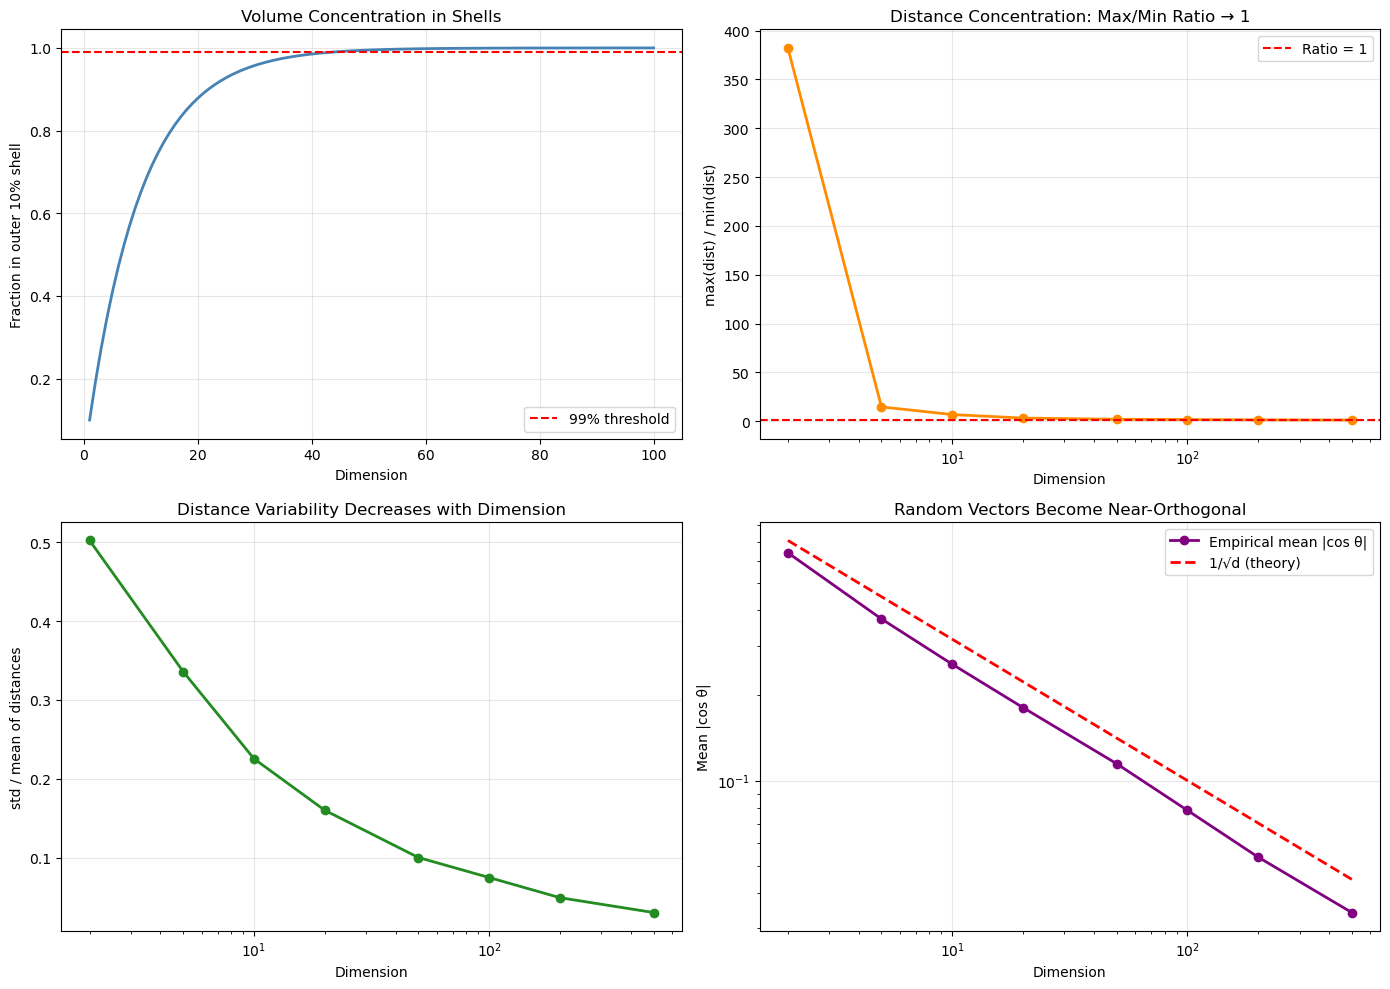

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Volume concentration
axes[0,0].plot(dims, fractions, linewidth=2, color='steelblue')
axes[0,0].axhline(y=0.99, color='r', linestyle='--', label='99% threshold')
axes[0,0].set_xlabel('Dimension'); axes[0,0].set_ylabel('Fraction in outer 10% shell')
axes[0,0].set_title('Volume Concentration in Shells')
axes[0,0].legend(); axes[0,0].grid(True, alpha=0.3)

# Max/min distance ratio
axes[0,1].plot(dims_dist, ratios, 'o-', linewidth=2, color='darkorange')
axes[0,1].axhline(y=1, color='r', linestyle='--', label='Ratio = 1')
axes[0,1].set_xlabel('Dimension'); axes[0,1].set_ylabel('max(dist) / min(dist)')
axes[0,1].set_title('Distance Concentration: Max/Min Ratio → 1')
axes[0,1].set_xscale('log'); axes[0,1].legend(); axes[0,1].grid(True, alpha=0.3)

# Coefficient of variation of distances
axes[1,0].plot(dims_dist, cvs, 'o-', linewidth=2, color='forestgreen')
axes[1,0].set_xlabel('Dimension'); axes[1,0].set_ylabel('std / mean of distances')
axes[1,0].set_title('Distance Variability Decreases with Dimension')
axes[1,0].set_xscale('log'); axes[1,0].grid(True, alpha=0.3)

# Orthogonality
dims_arr = np.array(dims_angle)
axes[1,1].plot(dims_angle, mean_cos_angles, 'o-', linewidth=2,
               color='purple', label='Empirical mean |cos θ|')
axes[1,1].plot(dims_angle, 1/np.sqrt(dims_arr), 'r--',
               linewidth=2, label='1/√d (theory)')
axes[1,1].set_xlabel('Dimension'); axes[1,1].set_ylabel('Mean |cos θ|')
axes[1,1].set_title('Random Vectors Become Near-Orthogonal')
axes[1,1].set_xscale('log'); axes[1,1].set_yscale('log')
axes[1,1].legend(); axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Results interpretation:**

**Volume concentration** is dramatic: at $d=10$, already 65.1% of the hypercube's volume lies in the outermost 10% shell; at $d=100$, this is effectively 100% (99.9973%). A Gaussian random vector in high dimensions has nearly all its probability mass concentrated in a thin annular region — the **typicality shell** at radius $\approx \sqrt{d}$. This is why Monte Carlo integration in high dimensions is so difficult: the volume is huge but sampled with near-zero probability density.

**Distance concentration** shows max/min ratios declining toward 1 as $d$ grows (1.52 at $d=10$, 1.09 at $d=500$). This means nearest-neighbour classifiers and retrieval systems based on Euclidean distance lose effectiveness in high dimensions — the "closest" and "farthest" points become virtually indistinguishable in relative terms.

**Near-orthogonality** follows the $1/\sqrt{d}$ theoretical decay closely (log-log plot shows the empirical curve hugging the red dashed line). At $d=500$, the mean $|\cos\theta| \approx 0.04$, meaning typical pairs of random vectors subtend angles within a few degrees of 90°. This underpins the intuition behind random projection methods (Johnson-Lindenstrauss) and the initialisation strategies of high-dimensional neural network weights.

Together, these three phenomena explain why algorithms designed for low-dimensional spaces often require substantial modification — or replacement — in the high-dimensional settings typical of modern machine learning.